
MODEL SELECTION AND TRAINING

Training set size: 32,632
Test set size: 8,159

Training models...

Linear Regression:
  Train R²: 0.1793
  Test R²: 0.0939
  Train RMSE: $1,687,949.13
  Test RMSE: $2,376,539.05
  Train MAE: $435,074.04
  Test MAE: $451,423.49

Ridge Regression:
  Train R²: 0.1793
  Test R²: 0.0939
  Train RMSE: $1,687,949.13
  Test RMSE: $2,376,538.82
  Train MAE: $435,066.23
  Test MAE: $451,415.37

Lasso Regression:
  Train R²: 0.1793
  Test R²: 0.0939
  Train RMSE: $1,687,949.13
  Test RMSE: $2,376,539.04
  Train MAE: $435,073.10
  Test MAE: $451,422.50

Decision Tree:
  Train R²: 0.9591
  Test R²: 0.1529
  Train RMSE: $376,699.81
  Test RMSE: $2,297,887.46
  Train MAE: $124,948.82
  Test MAE: $206,003.04

Random Forest:
  Train R²: 0.8993
  Test R²: 0.2682
  Train RMSE: $591,350.27
  Test RMSE: $2,135,862.83
  Train MAE: $88,856.67
  Test MAE: $186,394.69

Gradient Boosting:
  Train R²: 0.9581
  Test R²: 0.2621
  Train RMSE: $381,522.47
  Test RMSE: $2,144,762.36
  

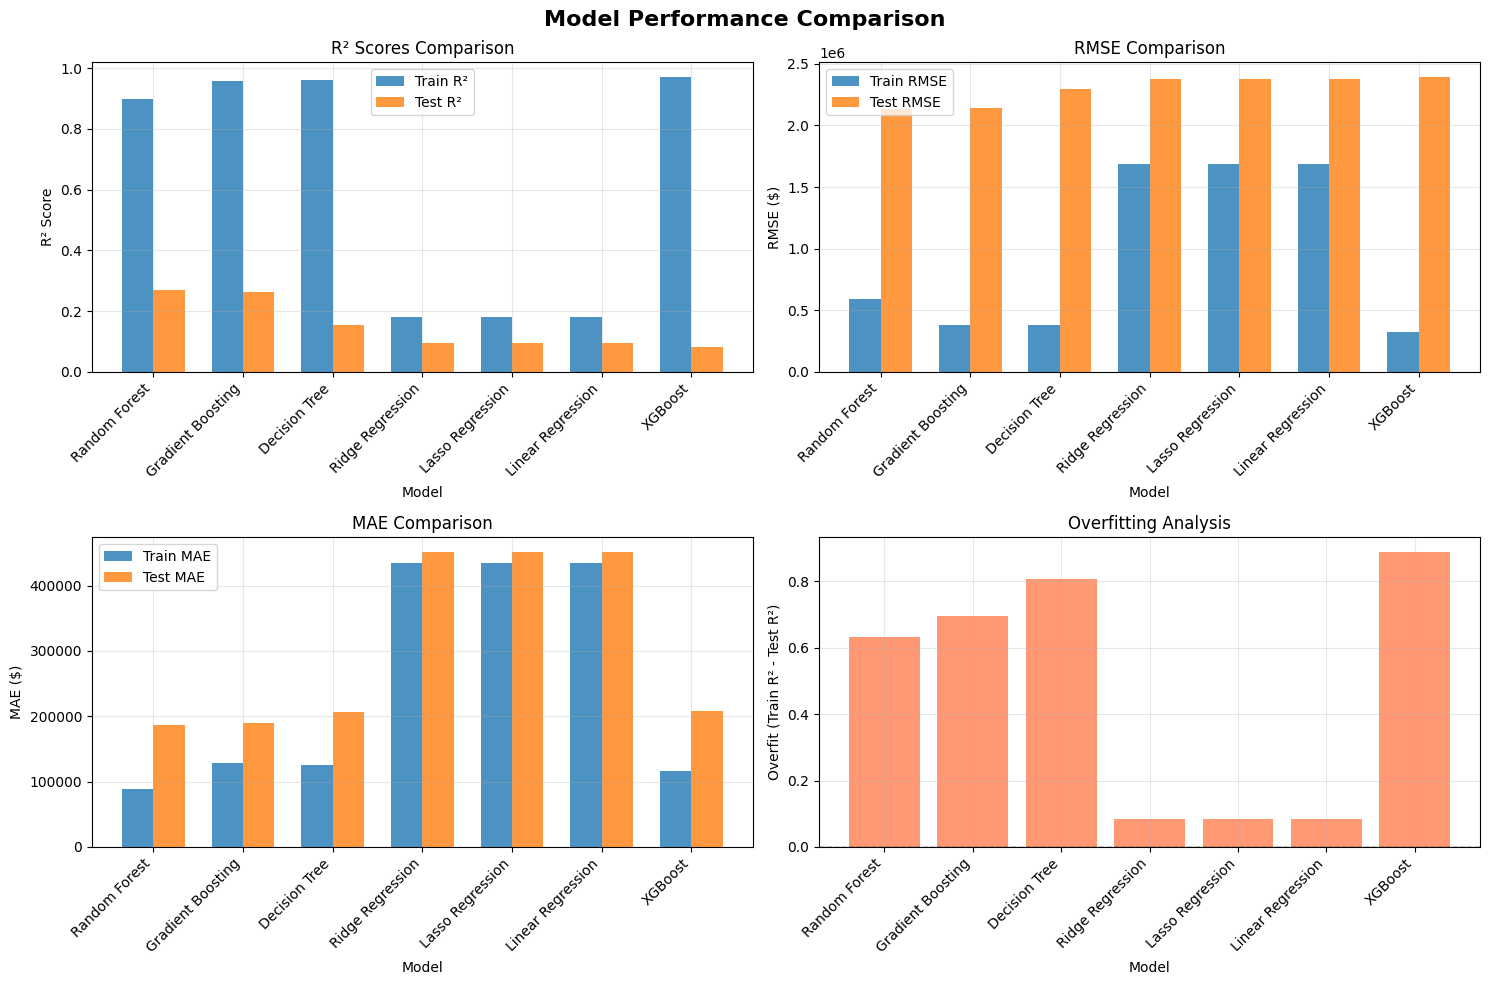


FEATURE IMPORTANCE ANALYSIS

Best Model: Random Forest

Random Forest Feature Importance:
             Feature  Importance
          Reputation    0.492314
                Caps    0.370559
                Apps    0.044331
     Is_top_5_League    0.029885
                 Age    0.024803
   Based_rich_nation    0.018742
Is_top_ranked_nation    0.008787
    Is_top_prev_club    0.005897
         EU_National    0.004683
   Last_Transfer_Fee    0.000000

XGBoost Feature Importance:
             Feature  Importance
                Caps    0.385872
          Reputation    0.271919
   Based_rich_nation    0.139422
     Is_top_5_League    0.074667
                Apps    0.042559
                 Age    0.038452
    Is_top_prev_club    0.019040
Is_top_ranked_nation    0.017001
         EU_National    0.011068
   Last_Transfer_Fee    0.000000


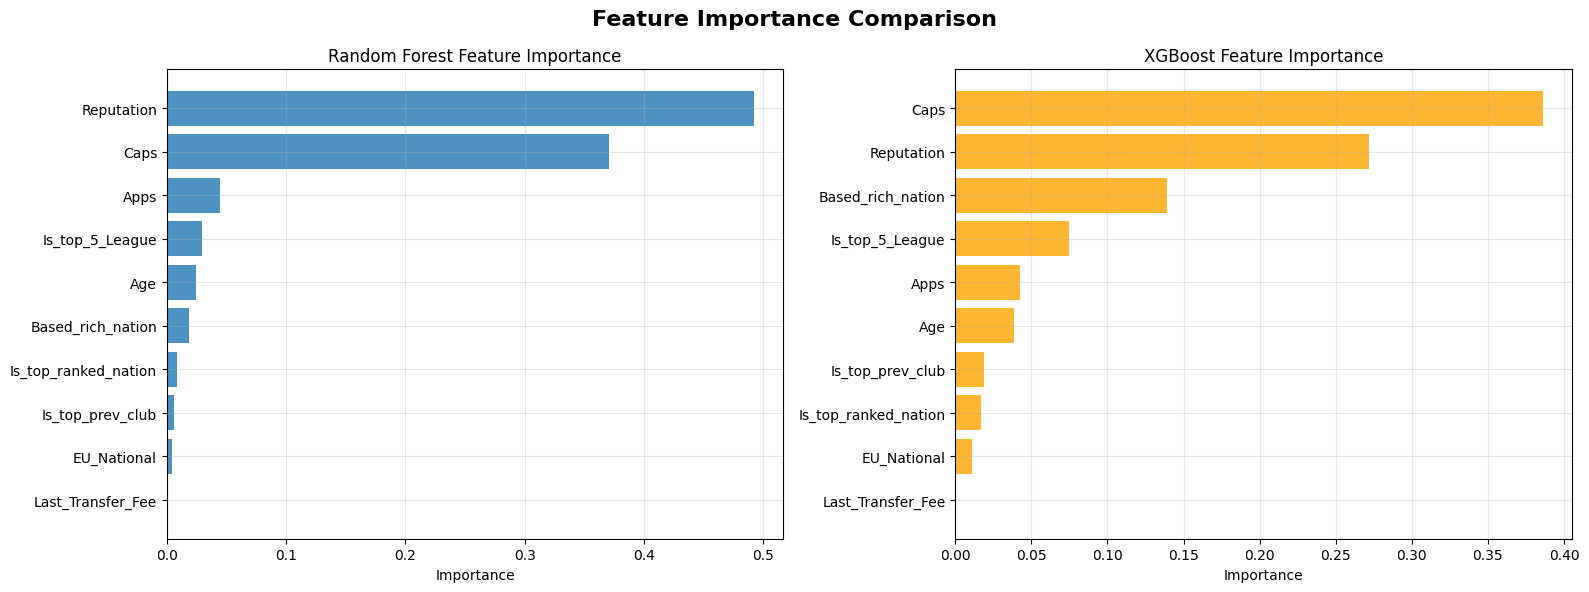


RESIDUAL ANALYSIS


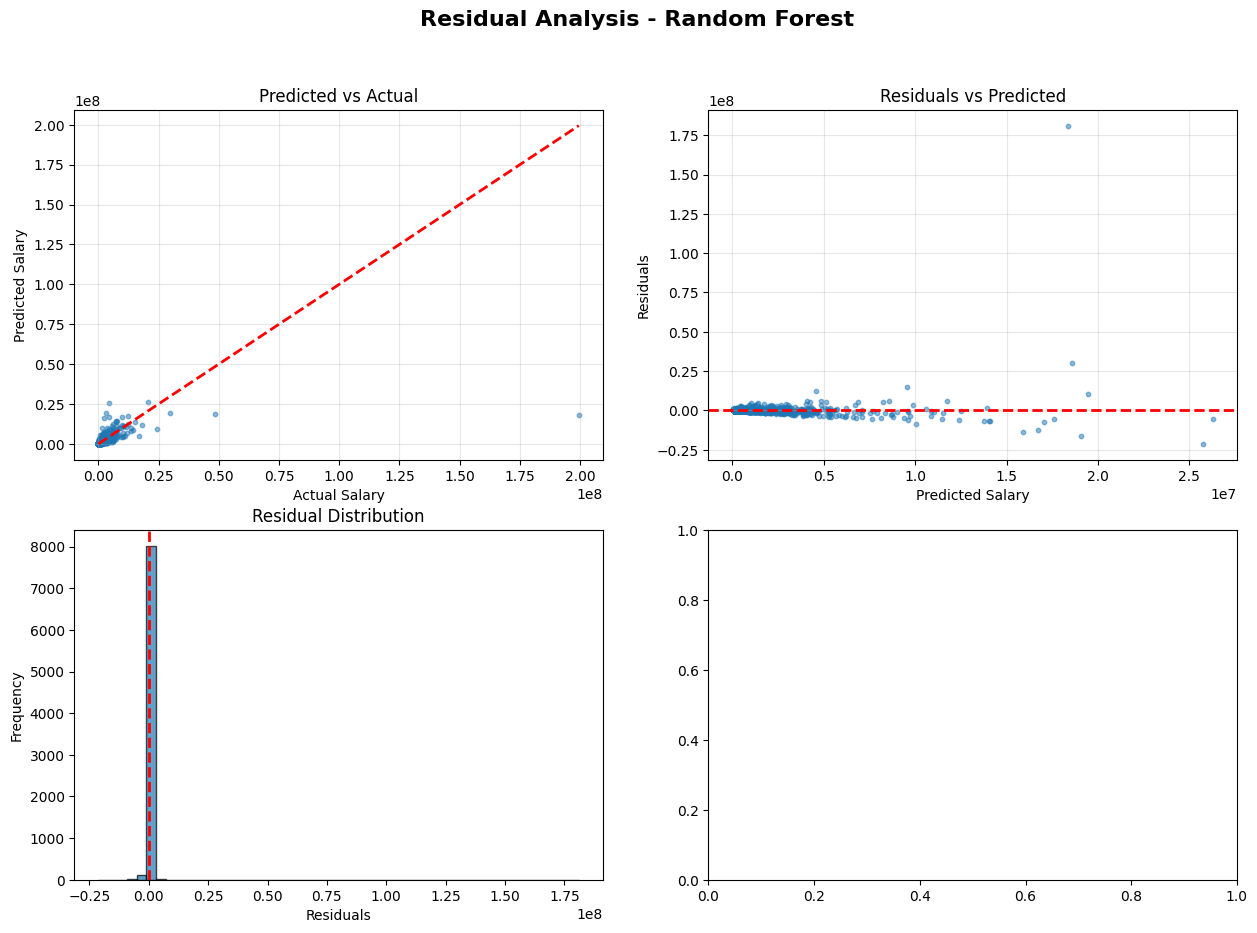

In [2]:
# ================================================================
# 11. MODEL SELECTION AND COMPARISON
# ================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset (assuming wages.csv is available in the environment)
df = pd.read_csv('/content/wages.csv')

print("\n" + "="*70)
print("MODEL SELECTION AND TRAINING")
print("="*70)

# Prepare data
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]:,}")
print(f"Test set size: {X_test.shape[0]:,}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)
}

# Train and evaluate models
results = []

print("\nTraining models...")
for name, model in models.items():
    print(f"\n{name}:")

    # Use scaled data for linear models
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    # Train
    model.fit(X_tr, y_train)

    # Predict
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)

    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Train RMSE: ${train_rmse:,.2f}")
    print(f"  Test RMSE: ${test_rmse:,.2f}")
    print(f"  Train MAE: ${train_mae:,.2f}")
    print(f"  Test MAE: ${test_mae:,.2f}")

    results.append({
        'Model': name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Overfit_R2': train_r2 - test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_R2', ascending=False)

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(results_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# R² scores
ax1 = axes[0, 0]
x = np.arange(len(results_df))
width = 0.35
ax1.bar(x - width/2, results_df['Train_R2'], width, label='Train R²', alpha=0.8)
ax1.bar(x + width/2, results_df['Test_R2'], width, label='Test R²', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Scores Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# RMSE
ax2 = axes[0, 1]
ax2.bar(x - width/2, results_df['Train_RMSE'], width, label='Train RMSE', alpha=0.8)
ax2.bar(x + width/2, results_df['Test_RMSE'], width, label='Test RMSE', alpha=0.8)
ax2.set_xlabel('Model')
ax2.set_ylabel('RMSE ($)')
ax2.set_title('RMSE Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# MAE
ax3 = axes[1, 0]
ax3.bar(x - width/2, results_df['Train_MAE'], width, label='Train MAE', alpha=0.8)
ax3.bar(x + width/2, results_df['Test_MAE'], width, label='Test MAE', alpha=0.8)
ax3.set_xlabel('Model')
ax3.set_ylabel('MAE ($)')
ax3.set_title('MAE Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Overfitting analysis
ax4 = axes[1, 1]
ax4.bar(x, results_df['Overfit_R2'], alpha=0.8, color='coral')
ax4.set_xlabel('Model')
ax4.set_ylabel('Overfit (Train R² - Test R²)')
ax4.set_title('Overfitting Analysis')
ax4.set_xticks(x)
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax4.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# 12. FEATURE IMPORTANCE (Best Model)
# ================================================================

print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Use best tree-based model for feature importance
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Model: {best_model_name}")

# Train Random Forest and XGBoost for feature importance
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Feature importance
feature_names = X.columns

rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

xgb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importance.to_string(index=False))

print("\nXGBoost Feature Importance:")
print(xgb_importance.to_string(index=False))

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Feature Importance Comparison', fontsize=16, fontweight='bold')

# Random Forest
axes[0].barh(rf_importance['Feature'], rf_importance['Importance'], alpha=0.8)
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest Feature Importance')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3)

# XGBoost
axes[1].barh(xgb_importance['Feature'], xgb_importance['Importance'], alpha=0.8, color='orange')
axes[1].set_xlabel('Importance')
axes[1].set_title('XGBoost Feature Importance')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# 13. RESIDUAL ANALYSIS (Best Model)
# ================================================================

print("\n" + "="*70)
print("RESIDUAL ANALYSIS")
print("="*70)

# Use best model
best_tree_model = xgb_model if results_df.iloc[0]['Model'] == 'XGBoost' else rf_model
y_pred = best_tree_model.predict(X_test)
residuals = y_test - y_pred

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Residual Analysis - {best_model_name}', fontsize=16, fontweight='bold')

# Predicted vs Actual
axes[0, 0].scatter(y_test, y_pred, alpha=0.5, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Salary')
axes[0, 0].set_ylabel('Predicted Salary')
axes[0, 0].set_title('Predicted vs Actual')
axes[0, 0].grid(True, alpha=0.3)

# Residuals vs Predicted
axes[0, 1].scatter(y_pred, residuals, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Salary')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted')
axes[0, 1].grid(True, alpha=0.3)

# Residual distribution
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)